In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
sns.set_style('whitegrid')


In [4]:
# Load the dataset 
df = pd.read_csv(r'C:\Users\aristolac\Downloads\simulated_lean_six_sigma_patient_data.csv')


# Display the first few rows of the data
df.head()


,Patient_ID,Arrival_to_Registration,Registration_to_Triage,Triage_to_Assessment,Doctor_Assignment_Time,Treatment_Time,Patient_Type,Triage_Level,Age,Condition_Severity,Patient_Satisfaction_Score,Outcome,Total_Process_Time
0,1,9,18,15,6,40,Ambulance,Low,41,Mild,1,Admitted,88
1,2,6,18,10,8,36,Walk-in,High,28,Mild,5,Discharged,78
2,3,13,18,14,5,53,Walk-in,Low,34,Mild,5,Discharged,103
3,4,10,8,18,9,16,Ambulance,Low,85,Mild,1,Discharged,61
4,5,7,9,21,7,52,Walk-in,High,64,Severe,1,Admitted,96


In [8]:
# Display basic information
print(df.info())
print(df.describe())

# Checking for null values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Patient_ID                  500 non-null    int64 
 1   Arrival_to_Registration     500 non-null    int64 
 2   Registration_to_Triage      500 non-null    int64 
 3   Triage_to_Assessment        500 non-null    int64 
 4   Doctor_Assignment_Time      500 non-null    int64 
 5   Treatment_Time              500 non-null    int64 
 6   Patient_Type                500 non-null    object
 7   Triage_Level                500 non-null    object
 8   Age                         500 non-null    int64 
 9   Condition_Severity          500 non-null    object
 10  Patient_Satisfaction_Score  500 non-null    int64 
 11  Outcome                     500 non-null    object
 12  Total_Process_Time          500 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 50.9+ KB
None

In [14]:
# Filling or drop missing values using forward fill
df.ffill(inplace=True)

# Check if 'Date' column exists before converting
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    print("The 'Date' column is not present in the dataset.")

# Create new columns with the correct existing columns
# Ensure column names match your dataset's actual columns
if all(col in df.columns for col in ['Registration_Time', 'Triage_Time', 'Assessment_Time']):
    df['Total_Process_Time'] = df['Registration_Time'] + df['Triage_Time'] + df['Assessment_Time']
else:
    print("One or more columns for 'Total_Process_Time' calculation are missing.")


The 'Date' column is not present in the dataset.
One or more columns for 'Total_Process_Time' calculation are missing.


In [16]:
print(df.columns)



Index(['Patient_ID', 'Arrival_to_Registration', 'Registration_to_Triage',
       'Triage_to_Assessment', 'Doctor_Assignment_Time', 'Treatment_Time',
       'Patient_Type', 'Triage_Level', 'Age', 'Condition_Severity',
       'Patient_Satisfaction_Score', 'Outcome', 'Total_Process_Time'],
      dtype='object')


In [18]:
# Recalculate 'Total_Process_Time' using existing columns
df['Total_Process_Time'] = (
    df['Arrival_to_Registration'] +
    df['Registration_to_Triage'] +
    df['Triage_to_Assessment'] +
    df['Doctor_Assignment_Time'] +
    df['Treatment_Time']
)

# Verify the new column
print(df[['Patient_ID', 'Total_Process_Time']].head())


   Patient_ID  Total_Process_Time
0           1                  88
1           2                  78
2           3                 103
3           4                  61
4           5                  96


In [20]:
# Handle missing values if needed
df.ffill(inplace=True)  # Forward fill for any missing data


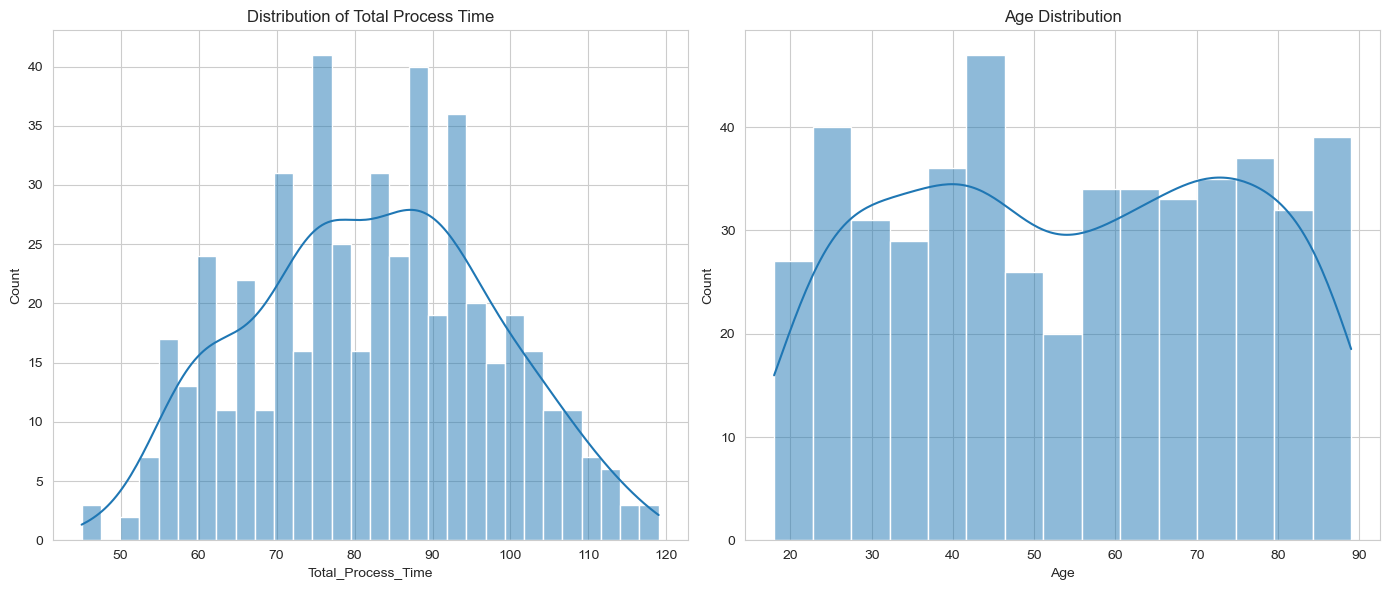

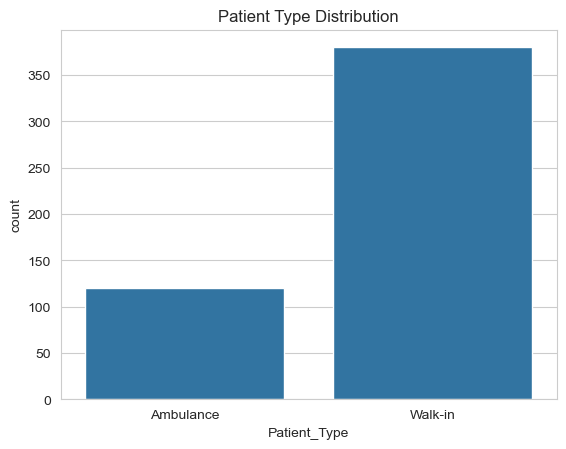

In [22]:
# Plot distributions of key variables, such as Total_Process_Time and Age
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Process_Time'], kde=True, bins=30)
plt.title('Distribution of Total Process Time')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

# Visualize patient type distribution
sns.countplot(x='Patient_Type', data=df)
plt.title('Patient Type Distribution')
plt.show()


<Figure size 1200x800 with 0 Axes>

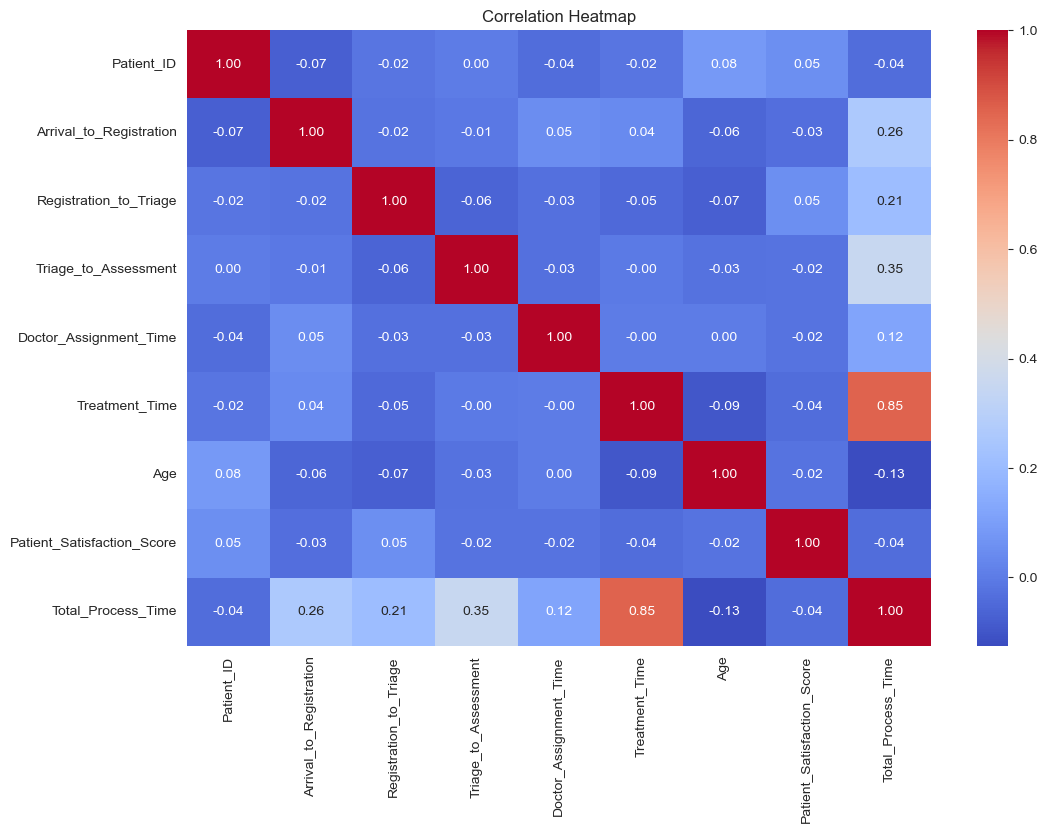

In [26]:
# Select only numerical columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


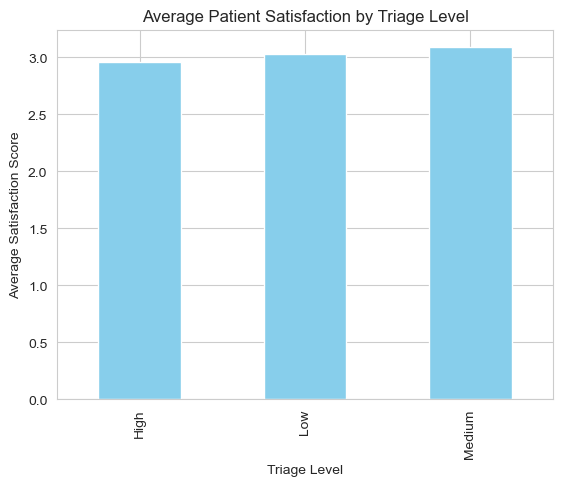

In [28]:
# Analyze average satisfaction scores by triage level
satisfaction_by_triage = df.groupby('Triage_Level')['Patient_Satisfaction_Score'].mean()
satisfaction_by_triage.plot(kind='bar', color='skyblue')
plt.title('Average Patient Satisfaction by Triage Level')
plt.xlabel('Triage Level')
plt.ylabel('Average Satisfaction Score')
plt.show()
